# Import section

In [5]:
%load_ext autoreload
%autoreload 2

from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scikitplot as skplot
from sklearn import linear_model
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from pipelinehelper import PipelineHelper

from context import ml_project
from ml_project.io import DataHandler
from ml_project.estimators import MeanValueClassifier

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Download data - HowTo

1) Download the zip folder from the web  
2) Create a directory inside the PROJECT_ROOT_DIR/data/ and give it a suitable name (DIR_NAME)  
3) Extract the files from the zip folder into DIR_NAME  
4) Set the correct DIR_NAME in the following cell

In [9]:
DIR_NAME = 'task0_data'

# Load all data (train and test data)

In [10]:
data_handler = DataHandler(DIR_NAME)
data = data_handler.load_train_and_test_data()

train_X = data['train_data'].drop(['y'], axis=1)
train_Y = data['train_data']['y']

test_X = data['test_data']


# Fitting the model on training data and performing predictions on test data

In [34]:
# This would be the actual procedure, given we would NOT know that the predicted value is the mean of all features

pipe_clf = Pipeline([('std_scale', StandardScaler()),
                     ('regr', PipelineHelper([
                         ('linregr', LinearRegression()),
                         ('sgdregr', SGDRegressor())
                     ])),
                     
])

param_grid = {
    'regr__selected_model': pipe_clf.named_steps['regr'].generate({
        'linregr__normalize': [True, False],
        'sgdregr__alpha': [0.0001, 0.001, 0.01]
    })
}

grid_clf = GridSearchCV(pipe_clf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=True)

grid_clf.fit(train_X, train_Y)

predictions = pd.DataFrame(grid_clf.predict(test_X))

predictions = predictions.rename(columns = {0:'y'})
predictions.index = test_X.index

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


In [38]:
best_estimator = grid_clf.best_estimator_
print('\nBest estimator:\n')
pprint(best_estimator)

print('\nGridsearch CV results:\n')
pprint(grid_clf.cv_results_)


Best estimator:

Pipeline(memory=None,
     steps=[('std_scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', PipelineHelper(available_models={'linregr': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True), 'sgdregr': SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,...    selected_model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)))])

Gridsearch CV results:

{'mean_fit_time': array([0.00930443, 0.00601759, 0.00799499, 0.01197715, 0.00936785]),
 'mean_score_time': array([0.00193481, 0.00160894, 0.00122223, 0.00170121, 0.00154862]),
 'mean_test_score': array([-1.00162949e-25, -1.16624610e-25, -9.98578438e-04, -1.03333891e-01,
       -9.89597966e+00]),
 'mean_train_score': array([-9.69076644e-26, -1.17757389e-25, -9.95187480e-04, -1.03113991e-01,
       -9.85587955e+00]),
 'param_regr__selected_model': masked_array(data=[('linregr', {'normalize': True}),
                   ('l

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished


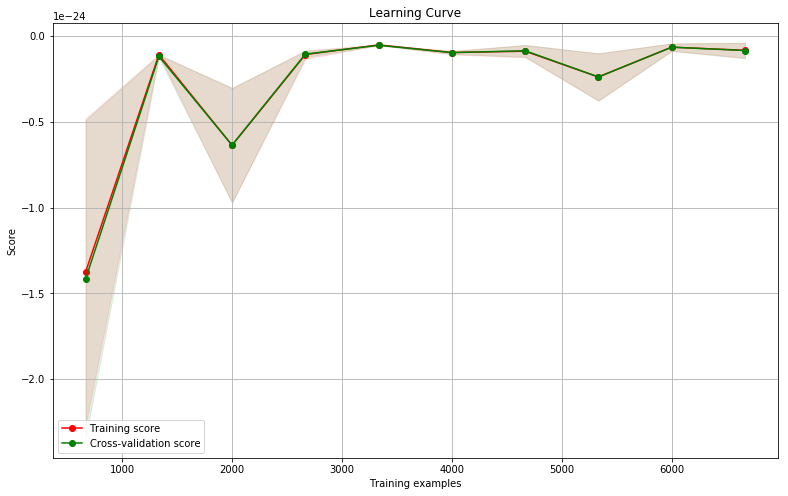

In [39]:
skplot.estimators.plot_learning_curve(grid_clf, train_X, train_Y, train_sizes=np.linspace(.1, 1.0, 10), 
                                      figsize=(13, 8), cv=3, scoring='neg_mean_squared_error')

In [54]:
# But... In this dummy task we know that the predicted value has to be the mean of the features, so
pred = pd.DataFrame(test_X.mean(axis=1)) 
predictions = predictions.rename(columns = {0:'y'})
predictions.index = test_X.index
pprint(predictions.head())

                y
Id               
10000  -66.002423
10001  451.406504
10002 -461.676417
10003   40.501209
10004 -126.744722


# Writing predictions back to disk in correct data format

In [ ]:
data_handler.store_prediction_file(predictions)